# Import Library

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import zipfile
import shutil
import tensorflow as tf
from keras_preprocessing.image import ImageDataGenerator
plt.style.use('ggplot')
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import random
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Sequential
from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.preprocessing import image
import pathlib

# Load Dataset

In [35]:
def unzip_data():
    newpath = './raw_dataset'
    if not os.path.exists(newpath):
        os.makedirs(newpath)
    loc_zip = './raw_dataset.zip'
    zip_ref = zipfile.ZipFile(loc_zip, 'r')
    zip_ref.extractall('./raw_dataset/')
    zip_ref.close()

unzip_data()
    

In [36]:
df_train = pd.read_csv('./raw_dataset/train/_annotations.csv')
df_test = pd.read_csv('./raw_dataset/test/_annotations.csv')
df_valid = pd.read_csv('./raw_dataset/valid/_annotations.csv')

In [37]:
df_train.head()

,filename,width,height,class,xmin,ymin,xmax,ymax
0,Screen-Shot-2021-11-20-at-10-30-41-PM_png.rf.3...,656,648,Acral Lentiginous Melanoma,87,0,598,602
1,Screen-Shot-2021-11-22-at-8-20-40-AM_png.rf.35...,130,154,Clubbing,21,25,128,107
2,Screen-Shot-2021-11-22-at-2-08-01-PM_png.rf.35...,232,206,Beaus Line,18,15,206,200
3,188_JPG.rf.36d263e3e2b25d3776b01dd7d6b15ae0.jpg,144,213,Pitting,8,33,141,170
4,h223_png.rf.374784c251fa553a5d41ba094bf22675.jpg,55,66,Healthy Nail,8,11,54,55


In [38]:
df_test.head()

,filename,width,height,class,xmin,ymin,xmax,ymax
0,Screen-Shot-2021-11-19-at-2-28-15-AM_png.rf.06...,760,700,Acral Lentiginous Melanoma,23,0,628,588
1,Screenshot-2021-11-22-143932_png.rf.0c7088b40f...,289,235,Terry-s Nail,20,51,236,206
2,k126_png.rf.0a4bf61a2288b7c1c875db00cf282ade.jpg,185,215,Koilonychia,35,46,134,157
3,Screen-Shot-2021-10-15-at-10-36-19-AM_png.rf.0...,400,508,Blue Finger,108,48,337,297
4,Screen-Shot-2021-11-19-at-2-05-47-AM_png.rf.11...,396,310,Acral Lentiginous Melanoma,100,113,274,304


In [39]:
df_valid.head()

,filename,width,height,class,xmin,ymin,xmax,ymax
0,Screen-Shot-2021-11-22-at-12-40-05-PM_png.rf.6...,198,288,Beaus Line,24,26,179,226
1,Screen-Shot-2021-10-15-at-11-43-11-AM_png.rf.5...,164,148,Beaus Line,42,23,137,135
2,298_JPG.rf.5bd545752d59406069cdaa9984718c17.jpg,167,204,Pitting,5,23,159,185
3,Screen-Shot-2021-11-22-at-11-08-21-PM_png.rf.6...,132,186,Terry-s Nail,7,47,114,159
4,Screen-Shot-2021-10-26-at-11-05-00-AM_png.rf.5...,186,186,Clubbing,31,0,157,183


In [40]:
df_valid[df_valid["class"] == 'Lindsay-s Nail']

,filename,width,height,class,xmin,ymin,xmax,ymax
143,Screenshot-2021-11-22-201341_png.rf.9c4b9fb65d...,186,190,Lindsay-s Nail,41,32,167,175
233,Screen-Shot-2021-11-22-at-10-57-32-PM_png.rf.b...,240,268,Lindsay-s Nail,214,236,223,237


In [41]:
df_valid.drop(df_valid[df_valid["class"] == 'Lindsay-s Nail'].index, inplace= True)

In [42]:
df_valid[df_valid["class"] == 'Lindsay-s Nail']

,filename,width,height,class,xmin,ymin,xmax,ymax


In [43]:
def copy_data_for_each_classes(df):
    newpath = './data'
    if not os.path.exists(newpath):
        os.makedirs(newpath)
        
    column = df_train['class'].unique()
    for classes in column:
        if not os.path.exists(os.path.join(newpath, classes)):
                os.makedirs(os.path.join(newpath, classes))
    
    if df.equals(df_train):
        column = df_train['class'].unique()
        for col in column:
            files = df[df['class']==f'{col}']['filename']
            for file in files:
                source = f"./raw_dataset/train/{file}"
                destination = f"./data/{col}/{file}"
                try:
                    shutil.copy(source, destination)
                    print("File copied successfully.")
                except shutil.SameFileError:
                    print("Source and destination represents the same file.")
                except PermissionError:
                    print("Permission denied.")
                except:
                    print("Error occurred while copying file.")
    elif df.equals(df_test):
        for col in column:
            files = df[df['class']==f'{col}']['filename']
            for file in files:
                source = f"./raw_dataset/test/{file}"
                destination = f"./data/{col}/{file}"
                try:
                    shutil.copy(source, destination)
                    print("File copied successfully.")
                except shutil.SameFileError:
                    print("Source and destination represents the same file.")
                except PermissionError:
                    print("Permission denied.")
                except:
                    print("Error occurred while copying file.")
    elif df.equals(df_valid):
        for col in column:
            files = df[df['class']==f'{col}']['filename']
            for file in files:
                source = f"./raw_dataset/valid/{file}"
                destination = f"./data/{col}/{file}"
                try:
                    shutil.copy(source, destination)
                    print("File copied successfully.")
                except shutil.SameFileError:
                    print("Source and destination represents the same file.")
                except PermissionError:
                    print("Permission denied.")
                except:
                    print("Error occurred while copying file.")
    

In [44]:
copy_data_for_each_classes(df_train)

File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied 

In [45]:
copy_data_for_each_classes(df_test)

File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied 

In [46]:
copy_data_for_each_classes(df_valid)

File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied 

# Generating and Spliting Data for Training and Testing

In [47]:
dir = './data'

data_dir_list = os.listdir(dir)
print('Folders :', os.listdir(dir))
classes = sorted(os.listdir(dir))
file_count = len(classes)
print(len(classes), 'class', classes)

Folders : ['Acral Lentiginous Melanoma', 'Beaus Line', 'Blue Finger', 'Clubbing', 'Healthy Nail', 'Koilonychia', 'Muehrckes Lines', 'Onychogryphosis', 'Pitting', 'Terry-s Nail']
10 class ['Acral Lentiginous Melanoma', 'Beaus Line', 'Blue Finger', 'Clubbing', 'Healthy Nail', 'Koilonychia', 'Muehrckes Lines', 'Onychogryphosis', 'Pitting', 'Terry-s Nail']


In [48]:
def create_folder():    
    base_dir = './dataset'
    if not os.path.exists(base_dir):
            os.makedirs(base_dir)
            
    train_dir = os.path.join(base_dir, 'train')
    if not os.path.exists(train_dir):
        os.mkdir(train_dir)
        
    valid_dir = os.path.join(base_dir, 'valid')
    if not os.path.exists(valid_dir):
        os.mkdir(valid_dir)
    
    classes = sorted(os.listdir('./data'))

    for i in classes:
        train_class_dir = os.path.join(train_dir, i)
        if not os.path.exists(train_class_dir):
            os.mkdir(train_class_dir)
        valid_class_dir = os.path.join(valid_dir, i)
        if not os.path.exists(valid_class_dir):
            os.mkdir(valid_class_dir)
create_folder()

In [49]:
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")

    training_length = int(len(files) * SPLIT_SIZE)
    testing_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    testing_set = shuffled_set[-testing_length:]

    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        shutil.copyfile(this_file, destination)

    for filename in testing_set:
        this_file = SOURCE + filename
        destination = TESTING + filename
        shutil.copyfile(this_file, destination)

In [50]:
split_size = .7

train_dir = './dataset/train/'
valid_dir = './dataset/valid/'

for i in classes:
  class_source_dir = f'./data/{i}/'
  class_train_dir = f'./dataset/train/{i}/'
  class_valid_dir = f'./dataset/valid/{i}/'
  split_data(class_source_dir, class_train_dir, class_valid_dir, split_size)

In [51]:
for i in classes:
    print('Training {} images are: '.format(i)+str(len(os.listdir(train_dir + '/' + i + '/'))))

Training Acral Lentiginous Melanoma images are: 249
Training Beaus Line images are: 152
Training Blue Finger images are: 204
Training Clubbing images are: 261
Training Healthy Nail images are: 208
Training Koilonychia images are: 182
Training Muehrckes Lines images are: 111
Training Onychogryphosis images are: 230
Training Pitting images are: 218
Training Terry-s Nail images are: 295


In [52]:
for i in classes:
    print('Valid {} images are: '.format(i)+str(len(os.listdir(valid_dir + '/' + i + '/'))))

Valid Acral Lentiginous Melanoma images are: 108
Valid Beaus Line images are: 66
Valid Blue Finger images are: 88
Valid Clubbing images are: 112
Valid Healthy Nail images are: 90
Valid Koilonychia images are: 78
Valid Muehrckes Lines images are: 48
Valid Onychogryphosis images are: 99
Valid Pitting images are: 94
Valid Terry-s Nail images are: 127


# Modeling and testing

In [53]:
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
  
  tf.random.set_seed(42)
  
  train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=0.2,
    fill_mode='nearest' 
)

  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=64,
                                                      class_mode='categorical',
                                                      target_size=(224, 224),
                                                      seed = 42)

  validation_datagen = ImageDataGenerator(rescale = 1./255.)

  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size= 64,
                                                                class_mode='categorical',
                                                                target_size=(224, 224),
                                                                seed = 42)
  return train_generator, validation_generator

In [54]:
TRAINING_DIR = "./dataset/train/"
VALIDATION_DIR = "./dataset/valid/"
train_generator, validation_generator = train_val_generators(TRAINING_DIR, VALIDATION_DIR)

Found 2110 images belonging to 10 classes.
Found 910 images belonging to 10 classes.


In [55]:
def lr_scheduler(epoch, learning_rate):
    if epoch < 10:
        return learning_rate
    else:
        return learning_rate * tf.math.exp(-0.1)

In [56]:
def create_model():
    base_model = tf.keras.applications.resnet_v2.ResNet50V2(input_shape=(224, 224, 3),
                                               include_top=False,
                                               weights='imagenet')
    
    for layer in base_model.layers:
        layer.trainable = False
    
    model = Sequential()
    model.add(base_model)
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer= tf.keras.optimizers.Adam(),
                loss= 'categorical_crossentropy',
                metrics=['accuracy']) 
    return model

In [57]:
model = create_model()
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
lr_callback = LearningRateScheduler(lr_scheduler)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 7, 7, 2048)        23564800  
                                                                 
 flatten_1 (Flatten)         (None, 100352)            0         
                                                                 
 dense_2 (Dense)             (None, 512)               51380736  
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 74,950,666
Trainable params: 51,385,866
Non-trainable params: 23,564,800
_________________________________________________________________


In [58]:
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    epochs=20,
                    callbacks=[lr_callback, callback])

Epoch 1/20
33/33 [==============================] - 27s 750ms/step - loss: 17.3077 - accuracy: 0.3720 - val_loss: 1.3724 - val_accuracy: 0.5593 - lr: 0.0010
Epoch 2/20
33/33 [==============================] - 15s 457ms/step - loss: 1.0350 - accuracy: 0.6754 - val_loss: 1.0955 - val_accuracy: 0.6451 - lr: 0.0010
Epoch 3/20
33/33 [==============================] - 15s 464ms/step - loss: 0.7965 - accuracy: 0.7436 - val_loss: 0.9940 - val_accuracy: 0.6912 - lr: 0.0010
Epoch 4/20
33/33 [==============================] - 16s 472ms/step - loss: 0.6235 - accuracy: 0.7891 - val_loss: 1.0652 - val_accuracy: 0.6879 - lr: 0.0010
Epoch 5/20
33/33 [==============================] - 15s 463ms/step - loss: 0.4968 - accuracy: 0.8403 - val_loss: 0.9482 - val_accuracy: 0.7253 - lr: 0.0010
Epoch 6/20
33/33 [==============================] - 15s 459ms/step - loss: 0.4042 - accuracy: 0.8716 - val_loss: 0.9840 - val_accuracy: 0.7187 - lr: 0.0010
Epoch 7/20
33/33 [==============================] - 15s 461ms/s

# Model Evaluation

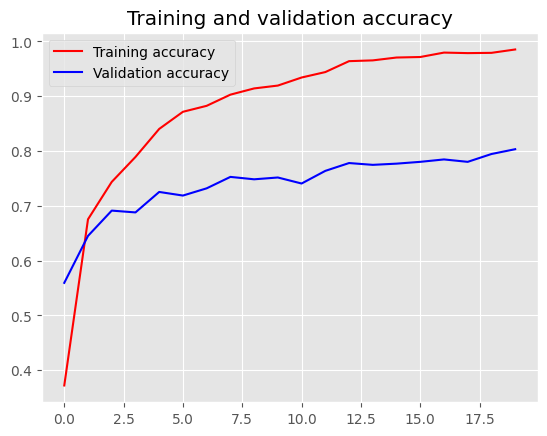

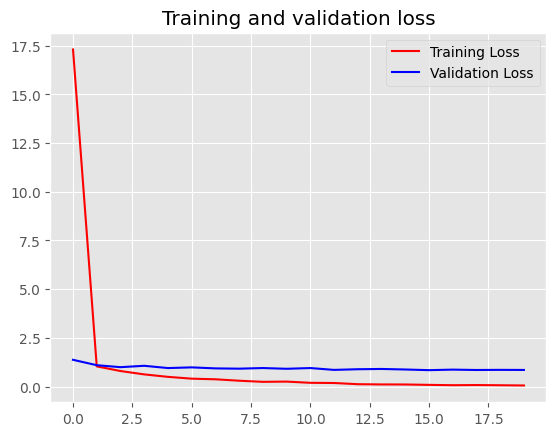

In [59]:
# Plot the chart for accuracy and loss on both training and validation
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Inference Model

In [60]:
def inference_model(path):
  img = path
  img = image.load_img(img, target_size=(224, 224))  # Adjust target size as per your model's input shape
  img_array = image.img_to_array(img)
  img_array = np.expand_dims(img_array, axis=0)
  img_array /= 255.  # Normalize the image data

  predictions = model.predict(img_array)
  predicted_class = np.argmax(predictions)
  classes = ['Acral Lentiginous Melanoma', 'Beaus Line', 'Blue Finger', 'Clubbing',
             'Healthy Nail', 'Koilonychia', 'Muehrckes Lines', 'Onychogryphosis',
             'Pitting', 'Terry-s Nail']

  print(f"Predicted class: {classes[predicted_class]}")
  
  accuracy = predictions[0][predicted_class] * 100.0
  print(f"Prediction accuracy: {accuracy:.2f}%")

# Save Model

In [61]:
export_dir = 'saved_model/1'

tf.saved_model.save(model, export_dir = export_dir)

INFO:tensorflow:Assets written to: saved_model/1\assets


INFO:tensorflow:Assets written to: saved_model/1\assets


In [62]:
# Select mode of optimization
mode = "Speed" 

if mode == 'Storage':
    optimization = tf.lite.Optimize.OPTIMIZE_FOR_SIZE
elif mode == 'Speed':
    optimization = tf.lite.Optimize.OPTIMIZE_FOR_LATENCY
else:
    optimization = tf.lite.Optimize.DEFAULT

In [63]:
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)

# Set the optimzations
converter.optimizations = [optimization]

# Invoke the converter to finally generate the TFLite model
tflite_model = converter.convert()

In [66]:
tflite_model_file = pathlib.Path('./model.tflite')
tflite_model_file.write_bytes(tflite_model)

75444480